In [2]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nltk.download('vader_lexicon')

df = pd.read_csv("../data/cleaned_reviews.csv")
df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/bezatezera/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,review_id,user_id,product_id,review_title,review_content,cleaned_review,cleaned_length,length
0,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",B07JW9H4J1,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,look durable charging fine toono complainschar...,36,Medium
1,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",B098NS6PVG,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,ordered cable connect phone android auto car c...,113,Very Long
2,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",B096MSW6CT,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",quite durable sturdy good nice productworking ...,10,Very Short
3,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",B08HDJ86NZ,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",good productlong wirecharges goodnicei bought ...,40,Medium
4,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",B08CF3B7N1,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",bought instead original apple work fast apple ...,227,Very Long


In [23]:
aspects = {
    "quality": ["quality", "durable", "sturdy", "solid", "build", "material", "construction"],
    "price": ["price", "expensive", "cheap", "value", "worth", "cost", "affordable"],
    "performance": ["work", "function", "perform", "fast", "speed", "efficient"],
    "design": ["design", "look", "color", "style", "appearance", "aesthetic"],
    "ease_of_use": ["easy", "simple", "difficult", "complicated", "user", "friendly", "intuitive"],
    "shipping": ["shipping", "delivery", "arrived", "package", "damaged", "late", "fast"],
    "customer_service": ["service", "support", "return", "refund", "warranty", "help"]
}

In [19]:
sia = SentimentIntensityAnalyzer()

def get_aspect_sentiment(text, aspects):
    aspect_sentiments = {}
    for aspect, keywords in aspects.items():
        if any(word in text.lower() for word in keywords):
            score = sia.polarity_scores(text)
            aspect_sentiments[aspect] = score['compound']
    return aspect_sentiments

df["aspect_sentiments"] = df["cleaned_review"].apply(lambda x: get_aspect_sentiment(x, aspects))

In [24]:
aspect_df = df["aspect_sentiments"].apply(pd.Series)
aspect_df.head(20)


,quality,price,performance,shipping,customer_service,design,ease_of_use
0,0.9419,0.9419,0.9419,0.9419,NaN,NaN,NaN
1,0.9750,0.9750,0.9750,0.9750,0.9750,NaN,NaN
2,0.8300,NaN,0.8300,NaN,NaN,NaN,NaN
3,NaN,0.9393,0.9393,0.9393,0.9393,NaN,NaN
4,0.9926,0.9926,0.9926,0.9926,0.9926,NaN,NaN
5,0.9538,0.9538,NaN,NaN,0.9538,NaN,NaN
6,0.7579,NaN,0.7579,NaN,0.7579,NaN,NaN
7,NaN,0.9670,0.9670,NaN,NaN,NaN,NaN
8,0.9932,0.9932,0.9932,0.9932,0.9932,0.9932,0.9932
9,0.9750,0.9750,0.9750,0.9750,0.9750,NaN,NaN


design              0.956391
ease_of_use         0.924958
shipping            0.917684
customer_service    0.909072
price               0.906686
quality             0.902148
performance         0.895401
dtype: float64


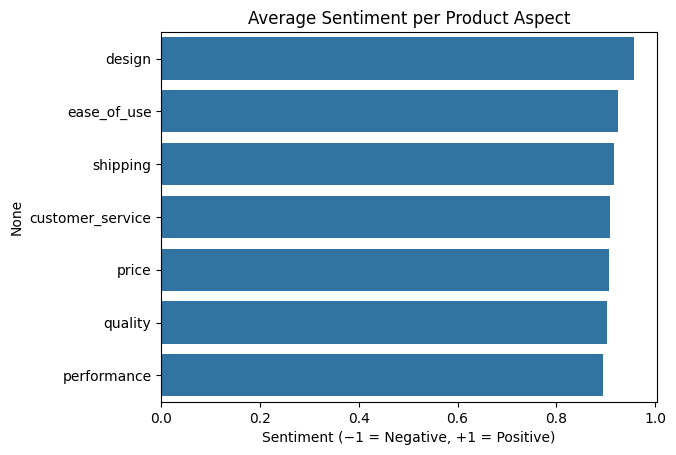

In [25]:
mean_sentiments = aspect_df.mean().sort_values(ascending=False)
print(mean_sentiments)
sns.barplot(x=mean_sentiments.values, y=mean_sentiments.index)
plt.title("Average Sentiment per Product Aspect")
plt.xlabel("Sentiment (−1 = Negative, +1 = Positive)")
plt.savefig('../results/visualization/avg_sentiment_per_product_aspect.png')
plt.show()


In [11]:
df.to_csv("aspect_sentiment_results.csv", index=False)


In [40]:
design_reviews = df[df["aspect_sentiments"].apply(lambda x: "price" in x)][["cleaned_review"]]

print(design_reviews)



                                         cleaned_review
0     look durable charging fine toono complainschar...
1     ordered cable connect phone android auto car c...
3     good productlong wirecharges goodnicei bought ...
4     bought instead original apple work fast apple ...
5     good productlikevery good item strong useful u...
...                                                 ...
1455  cost effective good heating personal self need...
1457  cord small sound heatingwell built button smoo...
1458  product like room heater package enough get da...
1460  received product without spannerexcellent prod...
1462  plastic cool body find sturdy surface put vert...

[1158 rows x 1 columns]


In [44]:
import pandas as pd

df = pd.read_csv("/Users/bezatezera/Desktop/Data/amazonSales/Amazon_sales_analytics/project3/data/aspect_sentiment_results.csv")

# Check a few entries in the aspect_sentiments column
print(df["aspect_sentiments"].head(5).tolist())
print("\nColumn names:", df.columns)


["{'charging': 0.9419, 'usability': 0.9419, 'camera_battery': 0.9419}", "{'charging': 0.975, 'usability': 0.975, 'camera_battery': 0.975}", "{'usability': 0.83}", "{'charging': 0.9393, 'usability': 0.9393}", "{'charging': 0.9926, 'usability': 0.9926, 'camera_battery': 0.9926}"]

Column names: Index(['review_id', 'user_id', 'product_id', 'review_title', 'review_content',
       'cleaned_review', 'cleaned_length', 'aspect_sentiments'],
      dtype='object')


In [45]:


# Convert aspect_sentiments from string to dict
df["aspect_sentiments"] = df["aspect_sentiments"].apply(ast.literal_eval)

# Dynamically get all aspect names present in your dataset
all_aspects = sorted({a for d in df["aspect_sentiments"] for a in d.keys()})
print("Detected aspects:", all_aspects)

# Get one representative review for each aspect
aspect_examples = {}
for aspect in all_aspects:
    aspect_reviews = df[df["aspect_sentiments"].apply(lambda x: aspect in x)]
    if not aspect_reviews.empty:
        example_review = aspect_reviews.sample(1).iloc[0]  # random example
        aspect_examples[aspect] = example_review["cleaned_review"]
    else:
        aspect_examples[aspect] = "No review found for this aspect."

# Display results
for aspect, review in aspect_examples.items():
    print(f"\n### {aspect.capitalize()}\n{review}\n")


Detected aspects: ['camera_battery', 'charging', 'display', 'sound', 'usability']

### Camera_battery
review using new vacuum mop pro day product bit tricky setup app follow youtube video get setup wish xiaomi provides video tutorial link user manual dont mention need bluetooth wifi connection setup app robot work together tip missing user manual wifi connectivity get lost sometimes router far certain place house time robot need brought back wifi range ghz connection work model robot take anywhere minute completely vaccum house battery life really good new model still left one complete sweep mop cycle house charging also bad took hr charge full first time couple time got confused specific area house reset entire house map work properly map created device sweeped mopped area couple time would repeat behavior dusting quality time amount dust collected staggering never knew much dust house mopping average would call light wiping mopping hard stain sticky stain dry stain affected mopping l